In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
prom_test = pd.read_csv('test.csv')
prom_test.head(4)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1


In [3]:
prom_test.shape

(16496, 18)

In [4]:
prom_test.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
dtype: object

In [5]:
#Create a label encoder object
le = LabelEncoder()

# Since most columns have 2 values i.e. Yes or No
le_count = 0
for col in prom_test.columns[1:]:
    if prom_test[col].dtype == 'object':
        if len(list(prom_test[col].unique())) <= 2:
            le.fit(prom_test[col])
            prom_test[col] = le.transform(prom_test[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count)) 

Gender
Foreign_schooled
Past_Disciplinary_Action
Previous_IntraDepartmental_Movement
4 columns were label encoded.


In [6]:
# convert rest of categorical variable into dummy
prom_test.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,1,Agency and others,2,1976,7.5,2017,0,0,65,FCT,1,Married,0,0,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,1,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,1,Married,0,0,1


In [7]:
prom_test.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                   int32
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                         int32
Marital_Status                          object
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                object
dtype: object

In [8]:
prom_test['Region'] = prom_test['State_Of_Origin']
prom_test['Region'].replace(['LAGOS', 'OGUN', 'OYO', 'ONDO', 'EKITI', 'OSUN'], 'SW', inplace=True)
prom_test['Region'].replace(['ABIA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO'], 'SE', inplace=True)
prom_test['Region'].replace(['RIVERS', 'DELTA', 'EDO', 'AKWA IBOM', 'BAYELSA', 'CROSS RIVER'], 'SS', inplace=True)
prom_test['Region'].replace(['FCT', 'NIGER', 'PLATEAU', 'KWARA', 'KOGI', 'BENUE', 'NASSARAWA'], 'NC', inplace=True)
prom_test['Region'].replace(['KANO', 'KADUNA', 'KATSINA', 'JIGAWA', 'KEBBI', 'ZAMFARA', 'SOKOTO'], 'NW', inplace=True)
prom_test['Region'].replace(['ADAMAWA', 'BAUCHI', 'BORNO', 'YOBE', 'GOMBE', 'TARABA'], 'NE', inplace=True)

In [9]:
prom_test["Qualification"].replace(np.nan,"Missing", inplace=True)

In [10]:
prom_test['Qualification'].value_counts()

First Degree or HND         11091
MSc, MBA and PhD             4456
Missing                       730
Non-University Education      219
Name: Qualification, dtype: int64

In [11]:
prom_test['No_of_previous_employers'].value_counts()

1              8060
0              5871
2               817
3               652
4               540
5               400
More than 5     156
Name: No_of_previous_employers, dtype: int64

In [12]:
prom_test['Trainings_Attended'].value_counts()

2     13397
3      2356
4       532
5       152
6        35
7        16
8         6
11        1
9         1
Name: Trainings_Attended, dtype: int64

In [13]:
prom_test['Last_performance_score'].value_counts()

7.5     5625
12.5    3528
10.0    2945
2.5     1898
5.0     1281
0.0     1219
Name: Last_performance_score, dtype: int64

In [14]:
prom_test['Qualification'].replace('Non-University Education', int(1), inplace=True)
prom_test['Qualification'].replace('Missing', int(2), inplace=True)
prom_test['Qualification'].replace('First Degree or HND', int(2), inplace=True)
prom_test['Qualification'].replace('MSc, MBA and PhD', int(3), inplace=True)
#prom_train['Qualification'].fillna(prom_train['Qualification'].median(), inplace=True)

In [15]:
prom_test['Qualification'].value_counts()

2    11821
3     4456
1      219
Name: Qualification, dtype: int64

In [16]:
# drop original column 'Year_of_birth', 'EmployeeNo' and 'Year_of_recruitment'from "prom_train"
prom_test.drop(['EmployeeNo', 'State_Of_Origin'] , axis = 1, inplace=True)

In [17]:
#Create a label encoder object
le = LabelEncoder()

# Since most columns have 2 values i.e. Yes or No
le_count = 0
for col in prom_test.columns[1:]:
    if prom_test[col].dtype == 'object':
        if len(list(prom_test[col].unique())) > 2:
            le.fit(prom_test[col])
            prom_test[col] = le.transform(prom_test[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count)) 

Channel_of_Recruitment
Marital_Status
No_of_previous_employers
Region
4 columns were label encoded.


In [18]:
le = LabelEncoder()
le.fit(prom_test['Division'])
prom_test['Division'] = le.transform(prom_test['Division']).astype(int)
prom_test['Division'].head(3)

0    3
1    3
2    7
Name: Division, dtype: int32

In [19]:
prom_test.dtypes

Division                                 int32
Qualification                            int64
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
Region                                   int32
dtype: object

In [20]:
prom_test.head(2)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Region
0,3,2,1,0,2,1976,7.5,2017,0,0,65,1,0,0,0,1,0
1,3,2,1,1,2,1991,0.0,2018,0,0,69,1,0,0,0,1,5


In [21]:
prom_test['Age'] = float(2019) - prom_test['Year_of_birth'].astype('float')
prom_test['Length_of_Service'] = float(2019) - prom_test['Year_of_recruitment'].astype('float')

In [22]:
# drop original column 'Year_of_birth', 'EmployeeNo' and 'Year_of_recruitment'from "prom_train"
prom_test.drop(['Year_of_birth', 'Year_of_recruitment'] , axis = 1, inplace=True)

In [23]:
prom_test.head().T

,0,1,2,3,4
Division,3.0,3.0,7.0,2.0,3.0
Qualification,2.0,2.0,3.0,2.0,2.0
Gender,1.0,1.0,1.0,1.0,1.0
Channel_of_Recruitment,0.0,1.0,1.0,0.0,0.0
Trainings_Attended,2.0,2.0,2.0,2.0,2.0
Last_performance_score,7.5,0.0,7.5,2.5,7.5
Targets_met,0.0,0.0,0.0,0.0,1.0
Previous_Award,0.0,0.0,0.0,0.0,0.0
Training_score_average,65.0,69.0,76.0,52.0,69.0
Foreign_schooled,1.0,1.0,1.0,0.0,1.0


In [24]:
onehot_encs = prom_test[['Division', 'Channel_of_Recruitment', 'Region', 'Marital_Status']]
onehot_encs.head()

,Division,Channel_of_Recruitment,Region,Marital_Status
0,3,0,0,0
1,3,1,5,0
2,7,1,2,0
3,2,0,4,2
4,3,0,0,0


In [25]:
# encode generation labels using one-hot encoding scheme
#gen_ohe = OneHotEncoder(categories='auto')
#gen_feature_arr = gen_ohe.fit_transform(
                              #onehot_encs).toarray()
#gen_feature_labels = list(onehot_encs.classes_)
#gen_features = pd.DataFrame(gen_feature_arr)
#gen_features.head().T

In [26]:
prom_test['Division'].value_counts()

1    5145
2    3375
3    2186
8    2086
4    1631
0     750
5     714
6     306
7     303
Name: Division, dtype: int64

In [27]:
division = onehot_encs[['Division']]
onehotencoder_d = OneHotEncoder(categories='auto') 
data_division = onehotencoder_d.fit_transform(division).toarray()
df_division = pd.DataFrame(data_division,columns=['Div_0', 'Div_1', 'Div_2', 'Div_3', 'Div_4', 'Div_5', 'Div_6', 'Div_7', 'Div_8' ])
df_division.head(10)

,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,Div_8
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
Region = onehot_encs[['Region']]
onehotencoder_r = OneHotEncoder(categories='auto') 
data_Region = onehotencoder_r.fit_transform(Region).toarray()
df_Region = pd.DataFrame(data_Region,columns=['Reg_0', 'Reg_1', 'Reg_2', 'Reg_3', 'Reg_4', 'Reg_5'])
df_Region.head(10)

,Reg_0,Reg_1,Reg_2,Reg_3,Reg_4,Reg_5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
Channel = onehot_encs[['Channel_of_Recruitment']]
onehotencoder_ch = OneHotEncoder(categories='auto') 
data_Channel = onehotencoder_ch.fit_transform(Channel).toarray()
df_Channel = pd.DataFrame(data_Channel,columns=['Channel_0', 'Channel_1', 'Channel_2'])
df_Channel.head(10)

,Channel_0,Channel_1,Channel_2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [30]:
Marital = onehot_encs[['Marital_Status']]
onehotencoder_ma = OneHotEncoder(categories='auto') 
data_Marital = onehotencoder_ma.fit_transform(Marital).toarray()
df_Marital = pd.DataFrame(data_Marital,columns=['Marital_0', 'Marital_1', 'Marital_2'])
df_Marital.head(10)

,Marital_0,Marital_1,Marital_2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [31]:
numerical = prom_test[['Trainings_Attended', 'Last_performance_score', 'Training_score_average', 'Age', 'Length_of_Service']]
numerical.head()

,Trainings_Attended,Last_performance_score,Training_score_average,Age,Length_of_Service
0,2,7.5,65,43.0,2.0
1,2,0.0,69,28.0,1.0
2,2,7.5,76,35.0,7.0
3,2,2.5,52,35.0,10.0
4,2,7.5,69,36.0,5.0


In [32]:
prom_test['No_of_previous_employers'].value_counts()

1    8060
0    5871
2     817
3     652
4     540
5     400
6     156
Name: No_of_previous_employers, dtype: int64

Text(11.5, 450, '$\\mu$=7.69')

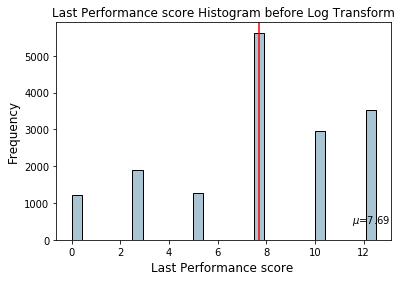

In [33]:
income_log_mean = np.round(np.mean(prom_test['Last_performance_score']), 2)
fig, ax = plt.subplots()
prom_test['Last_performance_score'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Last Performance score Histogram before Log Transform', 
             fontsize=12)
ax.set_xlabel('Last Performance score ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=32.84')

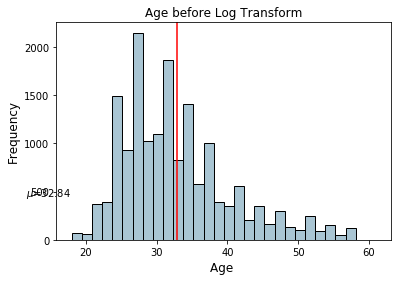

In [34]:
income_log_mean = np.round(np.mean(prom_test['Age']), 2)
fig, ax = plt.subplots()
prom_test['Age'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Age before Log Transform', 
             fontsize=12)
ax.set_xlabel('Age ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
Age = np.array(numerical['Age'])
l, opt_lambda = spstats.boxcox(Age)
numerical['Age'] = spstats.boxcox(numerical['Age'], lmbda=opt_lambda)
numerical['Age'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1.226779
1    1.198713
2    1.214464
3    1.214464
4    1.216266
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

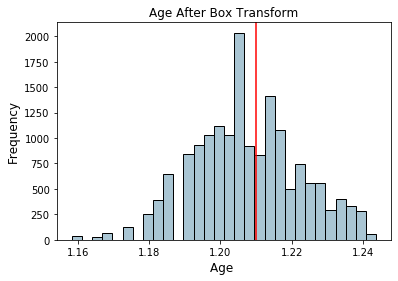

In [36]:
income_log_mean = np.round(np.mean(numerical['Age']), 2)
fig, ax = plt.subplots()
numerical['Age'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Age After Box Transform', 
             fontsize=12)
ax.set_xlabel('Age ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
#ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=5.88')

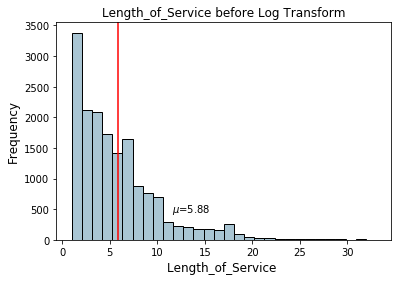

In [37]:
income_log_mean = np.round(np.mean(prom_test['Length_of_Service']), 2)
fig, ax = plt.subplots()
prom_test['Length_of_Service'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Length_of_Service before Log Transform', 
             fontsize=12)
ax.set_xlabel('Length_of_Service ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

In [38]:
Length_of_Service = np.array(numerical['Length_of_Service'])
l, opt_lambda = spstats.boxcox(Length_of_Service)
numerical['Length_of_Service'] = spstats.boxcox(numerical['Length_of_Service'], lmbda=opt_lambda)
numerical['Length_of_Service'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    0.730308
1    0.000000
2    2.258289
3    2.748239
4    1.819419
Name: Length_of_Service, dtype: float64

Text(0, 0.5, 'Frequency')

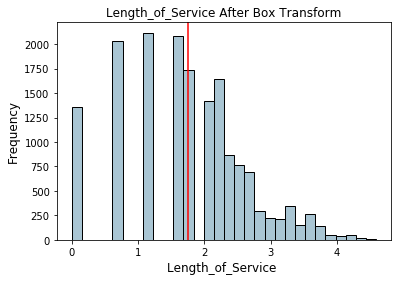

In [39]:
income_log_mean = np.round(np.mean(numerical['Length_of_Service']), 2)
fig, ax = plt.subplots()
numerical['Length_of_Service'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Length_of_Service After Box Transform', 
             fontsize=12)
ax.set_xlabel('Length_of_Service ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
#ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=55.43')

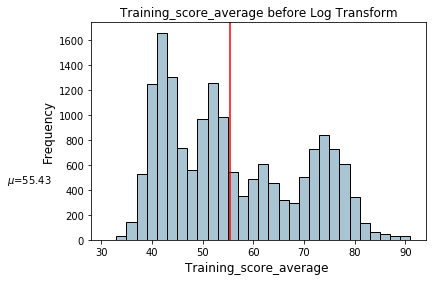

In [40]:
#Training_score_average
income_log_mean = np.round(np.mean(prom_test['Training_score_average']), 2)
fig, ax = plt.subplots()
prom_test['Training_score_average'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Training_score_average before Log Transform', 
             fontsize=12)
ax.set_xlabel('Training_score_average ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

In [41]:
Length_of_Service = np.array(numerical['Training_score_average'])
l, opt_lambda = spstats.boxcox(Length_of_Service)
numerical['Training_score_average'] = spstats.boxcox(numerical['Training_score_average'], lmbda=opt_lambda)
numerical['Training_score_average'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1.729550
1    1.736572
2    1.747491
3    1.701338
4    1.736572
Name: Training_score_average, dtype: float64

Text(0, 0.5, 'Frequency')

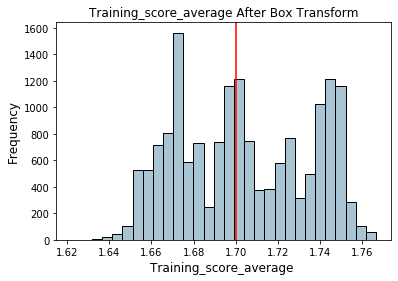

In [42]:
income_log_mean = np.round(np.mean(numerical['Training_score_average']), 2)
fig, ax = plt.subplots()
numerical['Training_score_average'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Training_score_average After Box Transform', 
             fontsize=12)
ax.set_xlabel('Training_score_average ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
#ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=2.25')

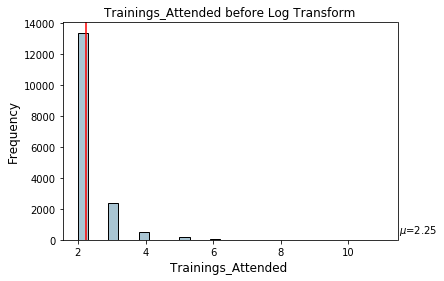

In [43]:
#Trainings_Attended
income_log_mean = np.round(np.mean(prom_test['Trainings_Attended']), 2)
fig, ax = plt.subplots()
prom_test['Trainings_Attended'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Trainings_Attended before Log Transform', 
             fontsize=12)
ax.set_xlabel('Trainings_Attended ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)


In [44]:
#numerical_transform = numerical[['Trainings_Attended', 'Last_performance_score', 'Training_score_average', 'Age', 'Length_of_Service']]
numerical.head()

,Trainings_Attended,Last_performance_score,Training_score_average,Age,Length_of_Service
0,2,7.5,1.729550,1.226779,0.730308
1,2,0.0,1.736572,1.198713,0.000000
2,2,7.5,1.747491,1.214464,2.258289
3,2,2.5,1.701338,1.214464,2.748239
4,2,7.5,1.736572,1.216266,1.819419


In [45]:
#test_others = prom_test[['Gender', 'Targets_met', 'Previous_Award', 'Foreign_schooled', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'No_of_previous_employers', 'Qualification']]
#df_division
#df_Region
#df_Channel
#df_Marital
#numerical
#target = prom_train[['Promoted_or_Not']]

In [46]:
# Place the DataFrames side by side
#test_data = pd.concat([test_others, df_division, df_Region, df_Channel, df_Marital, numerical], axis=1)
#test_data.head(7)

In [49]:
prom_test['Div_0'] = df_division['Div_0']
prom_test['Div_1'] = df_division['Div_1']
prom_test['Div_2'] = df_division['Div_2']
prom_test['Div_3'] = df_division['Div_3']
prom_test['Div_4'] = df_division['Div_4']
prom_test['Div_5'] = df_division['Div_5']
prom_test['Div_6'] = df_division['Div_6']
prom_test['Div_7'] = df_division['Div_7']
prom_test['Div_8'] = df_division['Div_8']
prom_test['Reg_0'] = df_Region['Reg_0']
prom_test['Reg_1'] = df_Region['Reg_1']
prom_test['Reg_2'] = df_Region['Reg_2']
prom_test['Reg_3'] = df_Region['Reg_3']
prom_test['Reg_4'] = df_Region['Reg_4']
prom_test['Reg_5'] = df_Region['Reg_5']
prom_test['Channel_0'] = df_Channel['Channel_0']
prom_test['Channel_1'] = df_Channel['Channel_1']
prom_test['Channel_2'] = df_Channel['Channel_2']
prom_test['Marital_0'] = df_Marital['Marital_0']
prom_test['Marital_1'] = df_Marital['Marital_1']
prom_test['Marital_2'] = df_Marital['Marital_2']
prom_test['Trainings_Attended'] = numerical['Trainings_Attended']
prom_test['Last_performance_score'] = numerical['Last_performance_score']
prom_test['Training_score_average'] = numerical['Training_score_average']
prom_test['Age'] = numerical['Age']
prom_test['Length_of_Service'] = numerical['Length_of_Service']
#prom_test['Promoted_or_Not']
prom_test = prom_test[['Qualification', 'Gender', 'Div_0', 'Div_1', 'Div_2', 'Div_3', 'Div_4', 'Div_5', 'Div_6', 'Div_7', 'Div_8', 'Reg_0', 'Reg_1', 'Reg_2', 'Reg_3', 'Reg_4', 'Reg_5', 'Channel_0', 'Channel_1', 'Channel_2', 'Marital_0', 'Marital_1', 'Marital_2', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average', 'Foreign_schooled', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'Age', 'Length_of_Service', 'No_of_previous_employers']]
prom_test.head(1)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers
0,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.5,0,0,1.72955,1,0,0,1.226779,0.730308,1


In [50]:
test_data = prom_test
test_data.head(7)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers
0,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.5,0,0,1.729550,1,0,0,1.226779,0.730308,1
1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1.736572,1,0,0,1.198713,0.000000,1
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7.5,0,0,1.747491,1,0,0,1.214464,2.258289,1
3,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0,0,1.701338,0,0,0,1.214464,2.748239,1
4,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.5,1,0,1.736572,1,0,0,1.216266,1.819419,0
5,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.5,1,0,1.655853,1,0,0,1.208462,2.438665,1
6,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.5,1,0,1.719797,1,0,0,1.201373,1.540299,1


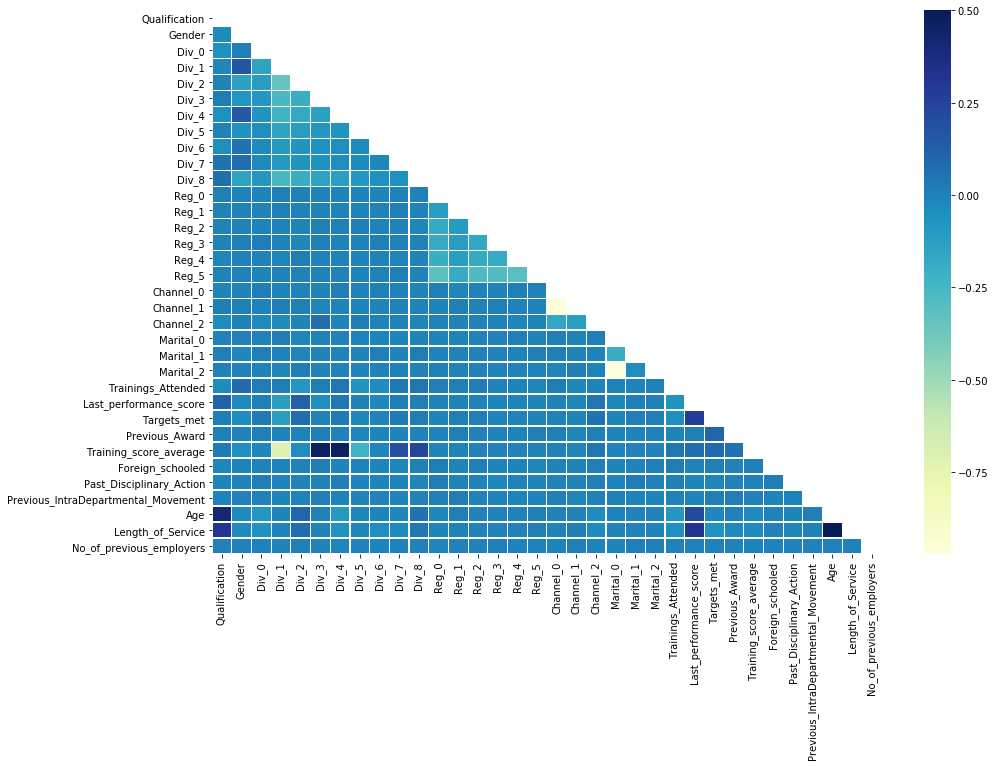

In [51]:
# Calculate correlations
corr = test_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

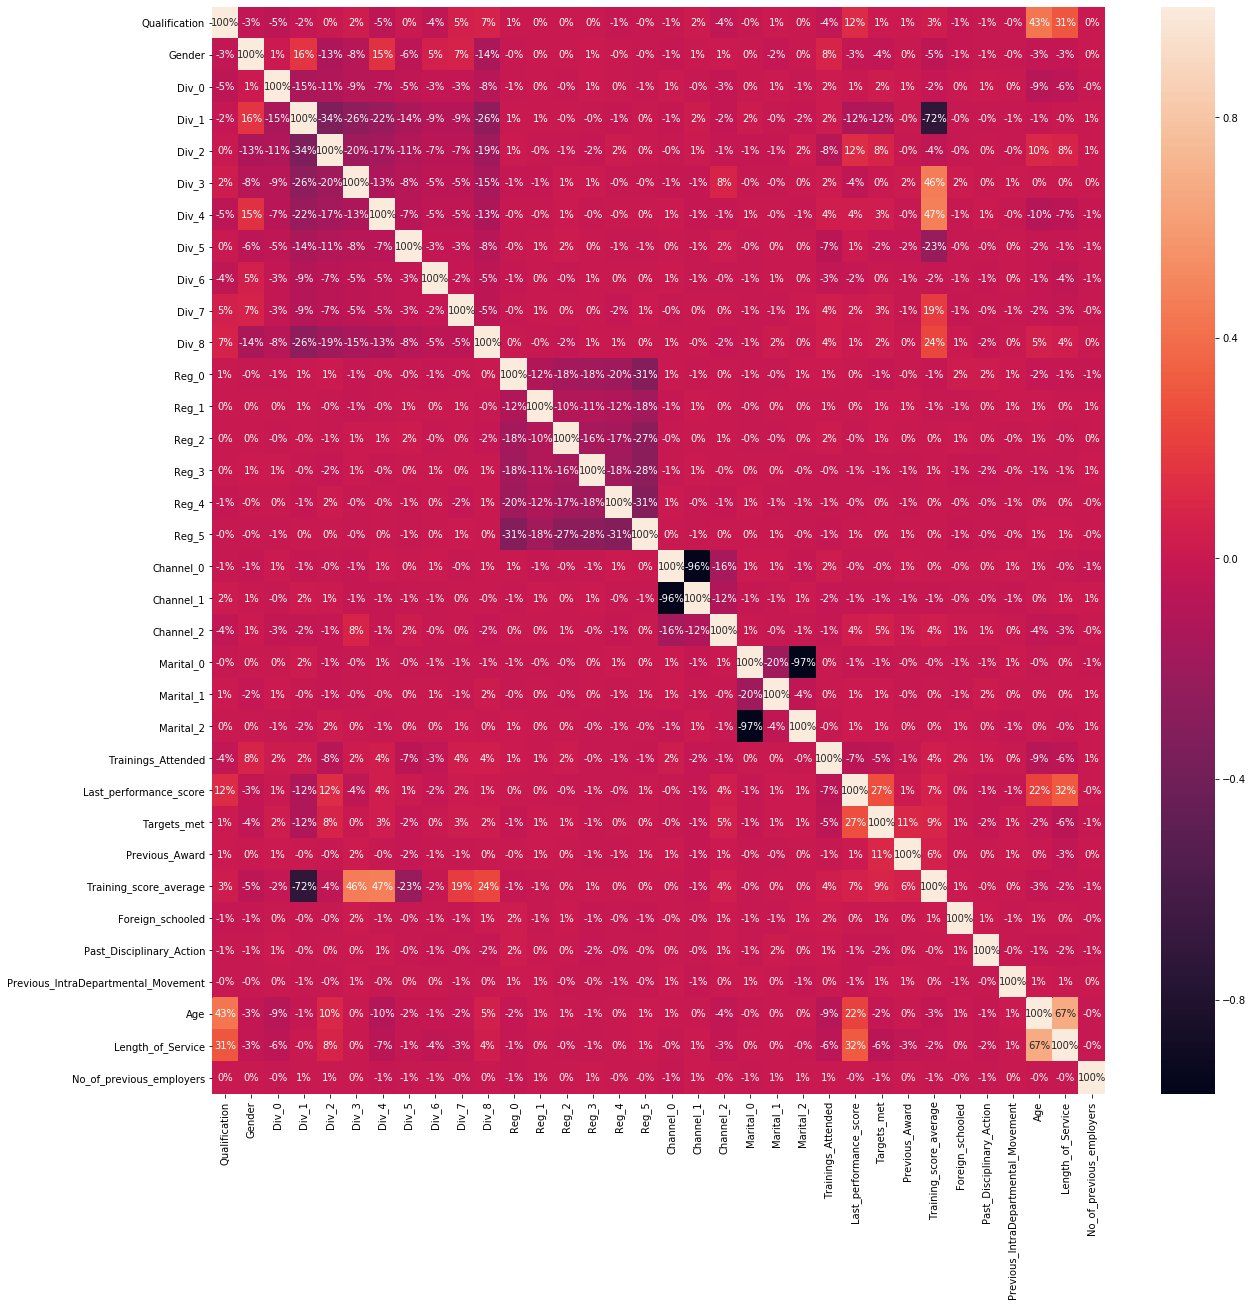

In [52]:
import seaborn as sns
#Visualize the correlation
plt.figure(figsize=(20,20))
sns.heatmap(test_data.corr(), annot=True, fmt='.0%')

In [53]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Prom_col = list(test_data.columns)
#Prom_col.remove('Promoted_or_Not')
for col in Prom_col:
    test_data[col] = test_data[col].astype(float)
    test_data[[col]] = scaler.fit_transform(test_data[[col]])
#train_data['Promoted_or_Not'] = pd.to_numeric(train_data['Promoted_or_Not'], downcast='float') 
test_data.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers
0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.6,0.0,0.0,0.744125,1.0,0.0,0.0,0.801878,0.159042,0.166667
1,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.792796,1.0,0.0,0.0,0.473326,0.000000,0.166667
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,0.0,0.0,0.868480,1.0,0.0,0.0,0.657710,0.491797,0.166667


In [54]:
#The data is exported for use in the modelling section
test_data.to_csv (r'C:\Users\OLUMEGBON ISMAIL\Desktop\Jupyter\Data_Science_Kaggle\Newtest_dataframe.csv', index = None, header=True)

In [55]:
test_data.shape

(16496, 34)